In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [62]:
data = pd.read_csv("c1_raw.csv", index_col=0)

data.columns = data.columns.astype(np.float)
data = data.loc[:,:70]

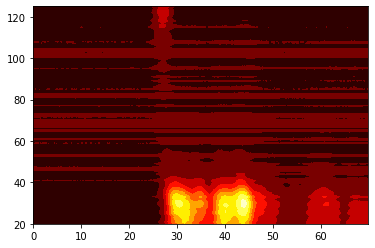

In [63]:
x,y = np.meshgrid(data.columns,data.index)
plt.contourf(x, y, data.values, cmap=cm.hot)

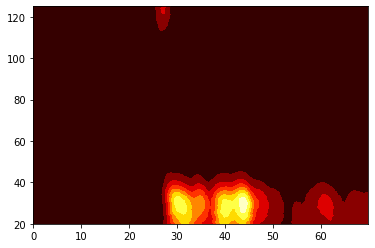

In [65]:
plt.contourf(x, y, data.values - np.min(data.values, axis=1)[:, None], cmap=cm.hot)

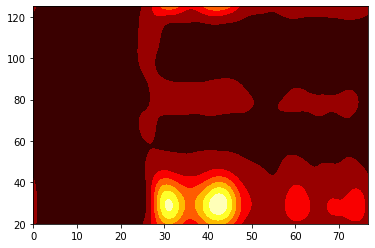

In [42]:
from scipy import fftpack
fft_result = fftpack.fft2(data.values)
keep_fraction = 0.03
fft_result2 = fft_result.copy()
r, c = fft_result2.shape

fft_result2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
fft_result2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
denoised_data = fftpack.ifft2(fft_result2).real
plt.contourf(x,y,denoised_data, cmap=cm.hot)


In [107]:
a = np.array([[1,2,3],[0.8,1.5,2],[0,0,0.3],[0,2,0]])
a

array([[1. , 2. , 3. ],
       [0.8, 1.5, 2. ],
       [0. , 0. , 0.3],
       [0. , 2. , 0. ]])

In [108]:
# multiplier = np.array([2,1,0])
multiplier = np.ones((1, a.shape[0]))
for idx, i in enumerate(multiplier[0]):
    length = multiplier[0].__len__()
    T0 = 30
    multiplier[0][length - idx - 1]*=np.exp(6*(idx - 30)/(273+idx))
multiplier
\

array([[0.55601694, 0.54285714, 0.52991615, 0.51719223]])

In [109]:
(multiplier.T * a)


array([[0.55601694, 1.11203388, 1.66805081],
       [0.43428571, 0.81428571, 1.08571428],
       [0.        , 0.        , 0.15897484],
       [0.        , 1.03438446, 0.        ]])

In [118]:
T0 = 25
T = 70
np.exp(10*(T-T0)/(273+T))


3.713420252116105

In [121]:
multiplier = np.ones((1, data.shape[0]))
for idx, i in enumerate(multiplier[0]):
    length = multiplier[0].__len__()
    T0 = 30
    multiplier[0][length - idx - 1]*=np.exp(6*(idx - 30)/(273+idx))
data = (multiplier.T * data)

temp_test = np.array([1,2,3,4,5,6])
np.mean(temp_test)

3.5